In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import linear_model
import joblib

In [197]:

df = pd.read_csv('titanic.csv')


In [198]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [200]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


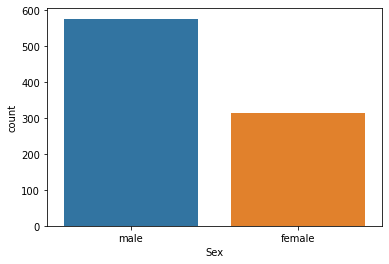

In [201]:
sns.countplot("Sex",data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


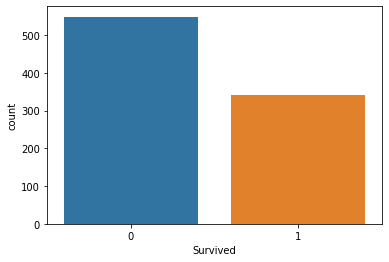

In [202]:
sns.countplot("Survived",data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


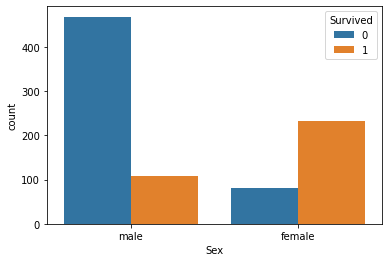

In [203]:
sns.countplot("Sex",hue="Survived",data=df)

In [204]:
df=df.drop(["PassengerId","SibSp","Parch","Ticket","Fare","Name"],axis=1)

In [205]:
df.head()

,Survived,Pclass,Sex,Age,Cabin,Embarked
0,0,3,male,22.0,NaN,S
1,1,1,female,38.0,C85,C
2,1,3,female,26.0,NaN,S
3,1,1,female,35.0,C123,S
4,0,3,male,35.0,NaN,S


In [206]:
df=df.dropna()

In [207]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [208]:
df["Sex"]=le.fit_transform(df["Sex"])
df["Cabin"]=le.fit_transform(df["Cabin"])
df["Embarked"]=le.fit_transform(df["Embarked"])

In [209]:
df

,Survived,Pclass,Sex,Age,Cabin,Embarked
1,1,1,0,38.0,72,0
3,1,1,0,35.0,48,2
6,0,1,1,54.0,117,2
10,1,3,0,4.0,131,2
11,1,1,0,58.0,43,2
...,...,...,...,...,...,...
871,1,1,0,47.0,91,2
872,0,1,1,33.0,29,2
879,1,1,0,56.0,61,0
887,1,1,0,19.0,25,2


In [210]:
model=linear_model.LogisticRegression()

In [211]:
from sklearn.model_selection import train_test_split

In [212]:
X=df.drop("Survived",axis=1)

In [213]:
Y=df["Survived"]

In [214]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)

In [215]:
model.fit(X_train,Y_train)

LogisticRegression()

In [216]:
X

,Pclass,Sex,Age,Cabin,Embarked
1,1,0,38.0,72,0
3,1,0,35.0,48,2
6,1,1,54.0,117,2
10,3,0,4.0,131,2
11,1,0,58.0,43,2
...,...,...,...,...,...
871,1,0,47.0,91,2
872,1,1,33.0,29,2
879,1,0,56.0,61,0
887,1,0,19.0,25,2


In [223]:
answer=model.predict(X_test)

In [224]:
from sklearn.model_selection import cross_val_score


In [225]:
len(X_test)

37

In [233]:
a=np.array(Y_test)

In [235]:
a[0]

1

In [240]:
count=0
for i in range(0,37):
  if answer[i]==a[i]:
    count+=1
    

In [239]:
count

24

In [241]:
len(X_train)

146

In [243]:
cross_val_score(LogisticRegression(),digits.data,digits.target)

NameError: ignored